<a href="https://colab.research.google.com/github/SirSeriki/Bike-Share-Case-Study/blob/main/Cyclistic_Bike_Share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing all necessary packages**


In [4]:
%load_ext rpy2.ipython

In [5]:
%%R
install.packages("plyr")
install.packages("tidyverse")
install.packages("here")
install.packages("skimr")
install.packages("janitor")
install.packages("ggplot2")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

**Installing the libraries**

In [6]:
%%R
library(tidyverse)
library(lubridate)
library(plyr)
library(dplyr)
library(here)
library(skimr)
library(janitor)
library(readr)
library(tidyr)


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


R[write to console]: ------------------------------------------------------------------------------

R[write to console]: You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

R[write to console]: -------------------------------------------------------

**Collecting data**





In [8]:
%%R
q4_2018 <- read.csv("Divvy_Trips_2018_Q4.csv")
q1_2019 <- read.csv("Divvy_Trips_2019_Q1.csv")
q3_2019 <- read.csv("Divvy_Trips_2019_Q3.csv")
q4_2019 <- read.csv("Divvy_Trips_2019_Q4.csv")

# Wrangling 

**Checking columns names for consistency before combining**

In [9]:
%%R
colnames(q4_2018)
colnames(q1_2019)
colnames(q3_2019)
colnames(q4_2019)

 [1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"        


**Checking the data for structure**

In [10]:
%%R
str(q4_2018)
str(q1_2019)
str(q3_2019)
str(q4_2019)


'data.frame':	642686 obs. of  12 variables:
 $ trip_id          : int  20983530 20983531 20983532 20983533 20983534 20983535 20983536 20983537 20983538 20983539 ...
 $ start_time       : chr  "2018-10-01 00:01:17" "2018-10-01 00:03:59" "2018-10-01 00:05:14" "2018-10-01 00:05:48" ...
 $ end_time         : chr  "2018-10-01 00:29:35" "2018-10-01 00:10:55" "2018-10-01 00:14:08" "2018-10-01 00:18:46" ...
 $ bikeid           : int  4551 847 6188 6372 1927 2392 308 1187 6247 3083 ...
 $ tripduration     : chr  "1,698.0" "416.0" "534.0" "778.0" ...
 $ from_station_id  : int  85 13 59 328 93 229 148 374 268 125 ...
 $ from_station_name: chr  "Michigan Ave & Oak St" "Wilton Ave & Diversey Pkwy" "Wabash Ave & Roosevelt Rd" "Ellis Ave & 58th St" ...
 $ to_station_id    : int  166 144 197 419 159 318 11 130 289 175 ...
 $ to_station_name  : chr  "Ashland Ave & Wrightwood Ave" "Larrabee St & Webster Ave" "Michigan Ave & Madison St" "Lake Park Ave & 53rd St" ...
 $ usertype         : chr  "Subscriber

**Using the mutate() function to change the datatype of "bikeid" to character. This will make the aggregation work correctly.**

In [11]:
%%R
q4_2018 <-  mutate(q4_2018, bikeid = as.character(bikeid))
q1_2019 <-  mutate(q3_2019, bikeid = as.character(bikeid))
q3_2019 <-  mutate(q3_2019, bikeid = as.character(bikeid)) 
q4_2019 <-  mutate(q4_2019, bikeid = as.character(bikeid))


**Combining all the individual quarters into one data frame**

In [12]:
%%R
all_trips <- bind_rows(q4_2018, q1_2019, q3_2019, q4_2019)

**Removing birthyear and gender fields as they wouldn't be necessary for this analysis all**

In [13]:
%%R
all_trips <- all_trips %>%  
  select(-c( birthyear, gender))

**Inspecting the combined dataframe**

In [14]:
%%R
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Retrieve the dimension of the data frame.
head(all_trips,3)  #See the first 6 rows of data frame.  Also tail(qs_raw)
str(all_trips)  #See list of columns and data types.
summary(all_trips)  #Statistical summary of data.

'data.frame':	4628176 obs. of  10 variables:
 $ trip_id          : int  20983530 20983531 20983532 20983533 20983534 20983535 20983536 20983537 20983538 20983539 ...
 $ start_time       : chr  "2018-10-01 00:01:17" "2018-10-01 00:03:59" "2018-10-01 00:05:14" "2018-10-01 00:05:48" ...
 $ end_time         : chr  "2018-10-01 00:29:35" "2018-10-01 00:10:55" "2018-10-01 00:14:08" "2018-10-01 00:18:46" ...
 $ bikeid           : chr  "4551" "847" "6188" "6372" ...
 $ tripduration     : chr  "1,698.0" "416.0" "534.0" "778.0" ...
 $ from_station_id  : int  85 13 59 328 93 229 148 374 268 125 ...
 $ from_station_name: chr  "Michigan Ave & Oak St" "Wilton Ave & Diversey Pkwy" "Wabash Ave & Roosevelt Rd" "Ellis Ave & 58th St" ...
 $ to_station_id    : int  166 144 197 419 159 318 11 130 289 175 ...
 $ to_station_name  : chr  "Ashland Ave & Wrightwood Ave" "Larrabee St & Webster Ave" "Michigan Ave & Madison St" "Lake Park Ave & 53rd St" ...
 $ usertype         : chr  "Subscriber" "Subscriber" "Subs

In [15]:
## Number of issues spotted:In the "usertype" column, the names for members ("subscriber") and casual riders ("Customer") are not consistent.

## We need to create columns for the day, day of the week, and month (among other times) that give us more ways to group the data.

## We do not know how long each of the rides are. We will create a "trip_duration" column that finds the difference between the start and end times of the ride by subtracting the "end_time" column from the "start_time"

%%R
table(all_trips$usertype) #Creating a table of the 'usertype'


  Customer Subscriber 
   1151818    3476358 


**Changing the 'Subscriber' to 'member' and 'Customer' to 'casual' for consistency and aggregation.**

In [16]:
%%R
all_trips <-  all_trips %>% 
  mutate(usertype = recode(usertype,"Subscriber" = "member"
                                   ,"Customer" = "casual"))
table(all_trips$usertype)


 casual  member 
1151818 3476358 


**Creating columns for the day, day of the week, and month that make it easier to group the data**

In [17]:
%%R
all_trips$date <- as.Date(all_trips$start_time) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
all_trips$ride_length <- difftime(all_trips$end_time,all_trips$start_time)


**In order to make sure that "ride_length" can be analyzed, We will check to make sure the column is numeric. If the variable isn't numeric, We will coerce the variable to numeric.**

In [18]:
%%R
str(all_trips)
if(!is.numeric(all_trips$ride_length))
  all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

'data.frame':	4628176 obs. of  16 variables:
 $ trip_id          : int  20983530 20983531 20983532 20983533 20983534 20983535 20983536 20983537 20983538 20983539 ...
 $ start_time       : chr  "2018-10-01 00:01:17" "2018-10-01 00:03:59" "2018-10-01 00:05:14" "2018-10-01 00:05:48" ...
 $ end_time         : chr  "2018-10-01 00:29:35" "2018-10-01 00:10:55" "2018-10-01 00:14:08" "2018-10-01 00:18:46" ...
 $ bikeid           : chr  "4551" "847" "6188" "6372" ...
 $ tripduration     : chr  "1,698.0" "416.0" "534.0" "778.0" ...
 $ from_station_id  : int  85 13 59 328 93 229 148 374 268 125 ...
 $ from_station_name: chr  "Michigan Ave & Oak St" "Wilton Ave & Diversey Pkwy" "Wabash Ave & Roosevelt Rd" "Ellis Ave & 58th St" ...
 $ to_station_id    : int  166 144 197 419 159 318 11 130 289 175 ...
 $ to_station_name  : chr  "Ashland Ave & Wrightwood Ave" "Larrabee St & Webster Ave" "Michigan Ave & Madison St" "Lake Park Ave & 53rd St" ...
 $ usertype         : chr  "member" "member" "member" "mem

In [19]:
# Remove "bad" data
## The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative or ride_length bigger than 7 days ( all_trips$ride_length> 7*24*60  )
## We will create a new version of the datadframe (v2) since data is being removed
## Following method has many NA rows. NA rows and if 'from_station_name is NA that row is excludeD

%%R
removed_data <-  all_trips %>% 
  filter( all_trips$from_station_name == "HQ QR" | all_trips$ride_length < 0)

all_trips_v2 <- all_trips %>% 
  filter(( all_trips$from_station_name != "HQ QR" | is.na(all_trips$from_station_name)) & all_trips$ride_length >= 0)

# Analysis

**Conducting descriptive analysis to find the dataframe's summary statistics**

In [20]:
%%R
summary(all_trips_v2$ride_length)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     1.02      7.03     12.15     26.01     21.95 150943.90 


**Next, we will compare members and casual users. Notice that on the average the metrics for causal riders outweighs those of member riders.**

In [21]:
%%R
  aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = mean)
  aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = median)
  aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = max)
  aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = min)
  aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype + all_trips_v2$day_of_week, FUN = mean)

   all_trips_v2$usertype all_trips_v2$day_of_week all_trips_v2$ride_length
1                 casual                   Friday                 65.22378
2                 member                   Friday                 14.13487
3                 casual                   Monday                 59.24714
4                 member                   Monday                 14.67625
5                 casual                 Saturday                 55.44826
6                 member                 Saturday                 16.74257
7                 casual                   Sunday                 59.31466
8                 member                   Sunday                 15.37849
9                 casual                 Thursday                 60.95794
10                member                 Thursday                 14.40957
11                casual                  Tuesday                 61.12511
12                member                  Tuesday                 14.48355
13                casual 

**Ordering the the day of the week**

In [22]:
%%R
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

#Rerun the previous aggregate() call. Days of week are now ordered properly. 

aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype + all_trips_v2$day_of_week, FUN = mean)
  

   all_trips_v2$usertype all_trips_v2$day_of_week all_trips_v2$ride_length
1                 casual                   Sunday                 59.31466
2                 member                   Sunday                 15.37849
3                 casual                   Monday                 59.24714
4                 member                   Monday                 14.67625
5                 casual                  Tuesday                 61.12511
6                 member                  Tuesday                 14.48355
7                 casual                Wednesday                 63.69512
8                 member                Wednesday                 14.38807
9                 casual                 Thursday                 60.95794
10                member                 Thursday                 14.40957
11                casual                   Friday                 65.22378
12                member                   Friday                 14.13487
13                casual 

# Visualization

**Rider Category**

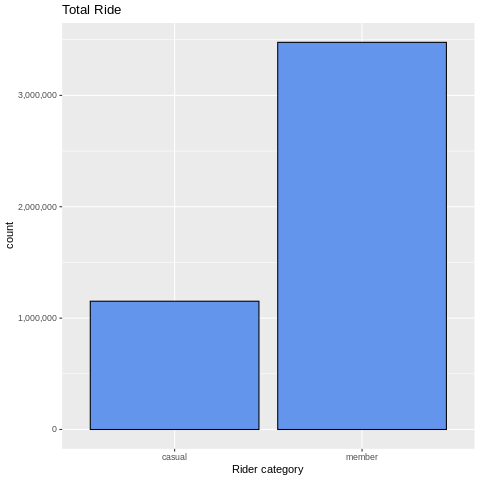

In [ ]:
 %%R
 ggplot(all_trips_v2,
        aes(x = usertype)) +
   geom_bar(fill = "cornflowerblue",
            color = "black") +
   scale_y_continuous(labels = scales::comma) +
   labs(x = "Rider category", title  = "Total Ride")
 

**Rider category based on dates**

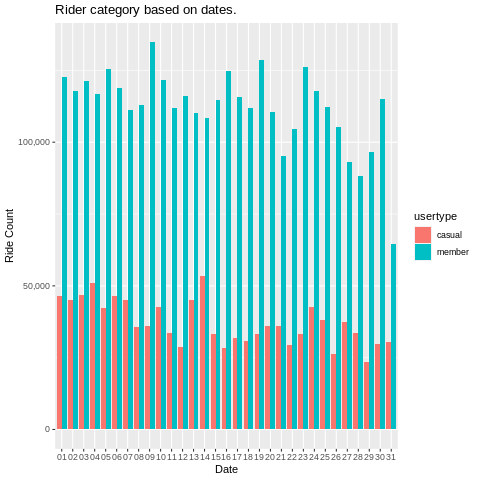

In [ ]:
%%R
ggplot(all_trips_v2,
        aes(x = day, 
            fill = usertype)) + 
   geom_bar(position = position_dodge(preserve = "single")) +
   scale_y_continuous(labels = scales::comma) +
   labs(x = "Date",y = "Ride Count", title  = "Rider category based on dates.")
 

In [ ]:
# Dates don't have any impact on the riding pattern

**Proportion of rider category based on dates**

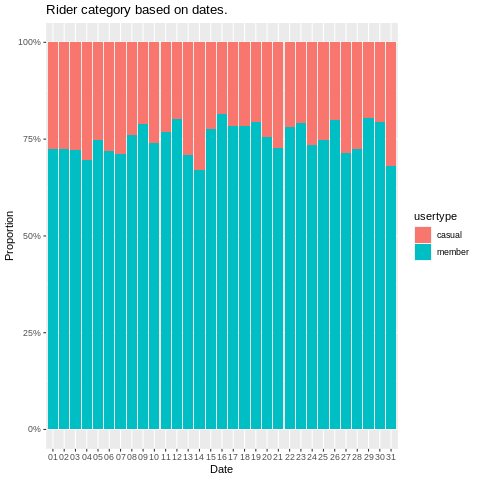

In [ ]:
 %%R
 ggplot(all_trips_v2,
        aes(x = day, 
            fill = usertype)) + 
   geom_bar(position = "fill") +
   scale_y_continuous(labels = scales::percent) +
   labs(x = "Date",y = "Proportion", title  = "Rider category based on dates.")

**Daily rider analysis**

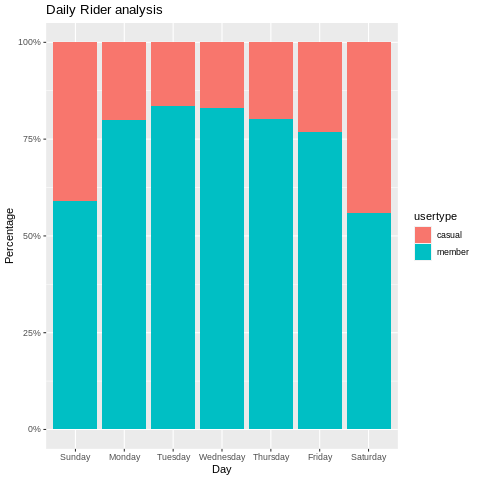

In [ ]:
%%R
ggplot(all_trips_v2,
        aes(x = day_of_week, 
            fill = usertype)) + 
   geom_bar(position = "fill") +
   scale_y_continuous(labels = scales::percent) +
   labs(x = "Day",y = "Percentage", title  = "Daily Rider analysis")
 

In [ ]:
# It seems more member riders ride on Tuesday and Wednesdays. While causal riders ride more on weekends.

**Monthly Rider analysis**

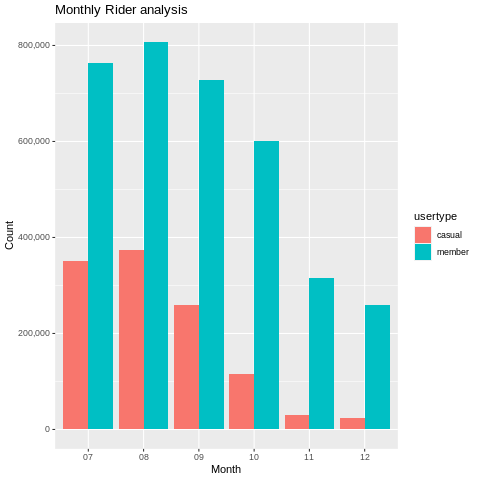

In [ ]:
 %%R
 ggplot(all_trips_v2,
        aes(x = month,
            fill = usertype)) +
   geom_bar(position = position_dodge(preserve = "single")) +
   scale_y_continuous(labels = scales::comma) +
   labs(x = "Month",y = "Count", title  = "Monthly Rider analysis")
 

In [ ]:
# Member riders contribute more to the overall monthly rides for at least half the year

**Weekdays and weekends Data Analysis**

In [ ]:
%%R
weekday_data <- subset(all_trips_v2,day_of_week == "Monday" | day_of_week == "Tuesday" |day_of_week == "Wednesday" | day_of_week == "Thursday"| day_of_week == "Friday")
weekend_data <- subset(all_trips_v2, day_of_week == "Saturday" |day_of_week == "Sunday")

 ## Weekday Data Analysis
 weekday_casual <- weekday_data %>%
   group_by(usertype) %>%
   dplyr::summarise(n = n()) %>%
   mutate(pct = n/sum(n), lbl = scales::percent(pct))
 
 weekday_casual
 
 # Member riders constitute 81% of the weekday rides

# Weekend data Analysis
 
 weekend_casual <- weekend_data %>%
   group_by(usertype) %>%
   dplyr::summarise(n = n()) %>%
   mutate(pct = n/sum(n), lbl = scales::percent(pct))
 
 weekend_casual

 # Member riders constitute 57% of the weekend riders and casual riders 43%, a significant increase in casual riders during the weekend compared to weekday.
 

# A tibble: 2 x 4
  usertype      n   pct lbl  
  <chr>     <int> <dbl> <chr>
1 casual   474348 0.426 43%  
2 member   638340 0.574 57%  


**Top station preference for Members and Casual riders**

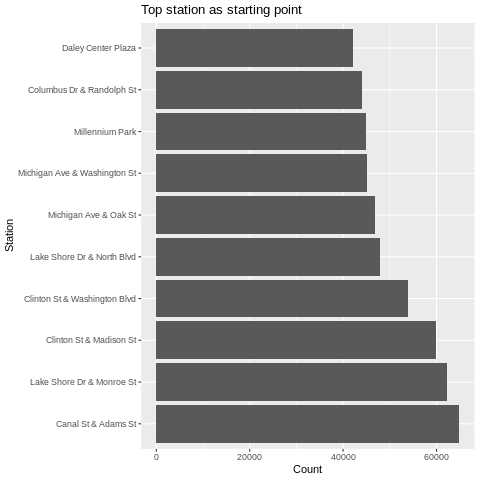

In [23]:
%%R
 top_stn <- as.data.frame(sort(table(all_trips_v2$from_station_name), decreasing=TRUE) [2:11])
 
 ggplot(top_stn,
        aes(x = Var1, 
            y = Freq)) +
   geom_bar(stat="identity") +
   coord_flip() +
   labs(x = "Station",y = "Count", title  = "Top station as starting point")
 
 ##The top preferred station for casual and member riders is Canal st & Adams St

**Average ride time**

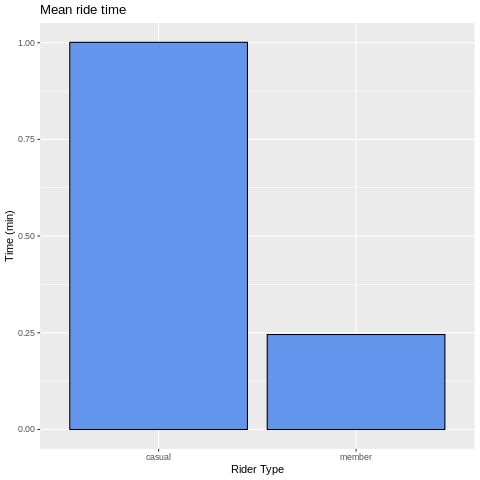

In [ ]:
%%R
plotdata <- all_trips_v2 %>%
   group_by(usertype) %>%
   dplyr::summarise(n = n(),
                    mean = mean(ride_length),
                    sd = sd(ride_length),
                    se = sd / sqrt(n))

ggplot(plotdata,
       aes(x=usertype,
           y = mean / 60)) +
   geom_bar(stat="identity",
            fill = "cornflowerblue",
            color = "black") +
   labs(x = "Rider Type", y = "Time (min)", title  = "Mean ride time")

 # Casual riders have a longer ride time than member riders on the average 

**Average ride time per month**

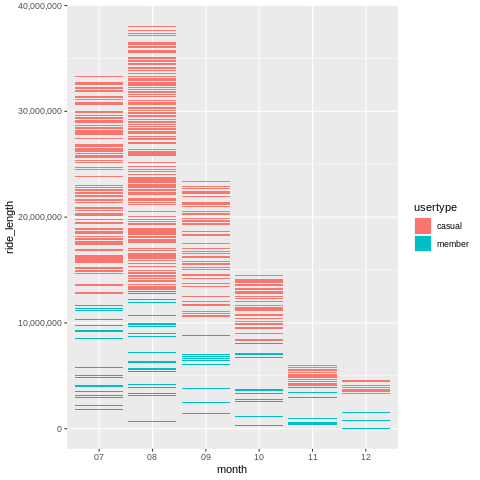

In [ ]:
%%R
ggplot(all_trips_v2) +
   geom_col(mapping=aes(x=month, y=ride_length, fill=usertype)) +
   scale_y_continuous(labels = scales::comma)


In [ ]:
 # Casual riders ride for longer lengths monthly on the average

**Percentage of Ride by Rider type**

`summarise()` has grouped output by 'day_of_week'. You can override using the `.groups` argument.


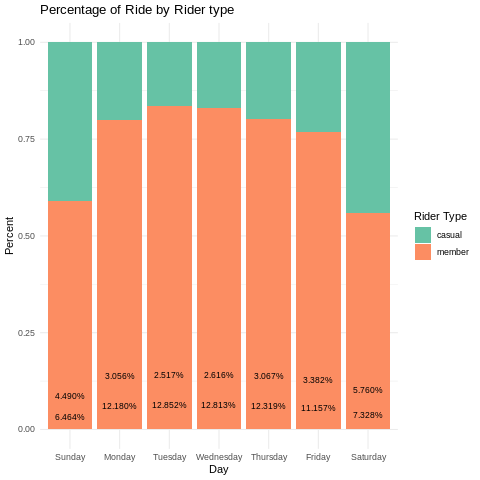

In [ ]:
%%R
plotdata <- all_trips_v2 %>%
   group_by(day_of_week, usertype) %>%
   dplyr::summarise(n = n()) %>%
   mutate(pct = n/sum(n), lbl = scales::percent(pct))

ggplot(plotdata, 
       aes(x = factor(day_of_week,
                      levels = c("Sunday", "Monday", "Tuesday", "Wednesday",
                                 "Thursday", "Friday", "Saturday")),
           y = pct,
           fill = usertype)) + 
   geom_bar(stat = "identity",
            position = "fill") +
   geom_text(aes(label = lbl), 
             size = 3, 
             position = position_stack(vjust = 0.5)) +
   scale_fill_brewer(palette = "Set2") +
   labs(y = "Percent", 
        fill = "Rider Type",
        x = "Day",
        title = "Percentage of Ride by Rider type") +
   theme_minimal()

**Proportion of Trip duration based on Rider type**

`summarise()` has grouped output by 'day_of_week'. You can override using the `.groups` argument.


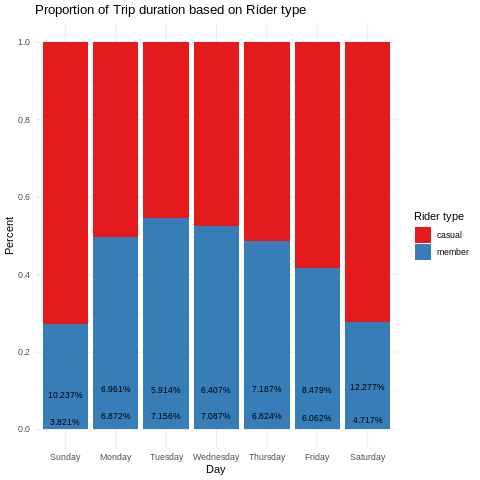

In [ ]:
%%R
plotdata <- all_trips_v2 %>%
   group_by(day_of_week, usertype) %>%
   dplyr::summarise(trip_time = sum(ride_length)) %>%
   mutate(pct = as.numeric(trip_time)/sum(as.numeric(trip_time)), lbl = scales::percent(pct))

ggplot(plotdata, 
       aes(x = factor(day_of_week,
                      levels = c("Sunday", "Monday", "Tuesday", "Wednesday",
                                 "Thursday", "Friday", "Saturday")),
           y = pct,
           fill = usertype)) + 
   geom_bar(stat = "identity",
            position = "fill") +
   scale_y_continuous(breaks = seq(0, 1, .2),
   ) +
   geom_text(aes(label = lbl), 
             size = 3, 
             position = position_stack(vjust = 0.5)) +
   scale_fill_brewer(palette = "Set1") +
   labs(y = "Percent", 
        fill = "Rider type",
        x = "Day",
        title = "Proportion of Trip duration based on Rider type") +
   theme_minimal()

In [ ]:
# The last 2 visualizations denote that although Member riders are higher the proportion of the trip duration seems to be pretty high for casual members
 

#  Key Takeways




*   Dates don't have any impact on the riding pattern
*   It seems more member riders ride on Tuesday and Wednesdays. While causal riders ride more on weekends


* The months of July, August and September record the highest number of rides, with August seeing the higest rides.

*    Member riders contribute more to the overall monthly rides for at least half the year

*   Member riders constitute 81% of the weekday rides, while casual riders constitute a total of 43% of the weekend rides, a significant increase in casual riders during the weekend compared to weekday



*   The top preferred station for casual and member riders is Canal st & Adams St

*   Casual riders have a longer ride time than member riders on the average even though the proportion of member riders is higher. 

# Recommendations

As per analysis July, August and September record the highest number of rides, with August seeing the highest rides. We will recommend that stakeholders run campaigns starting from July until September. Starting with a giveaway promotion at Canal st 7 Adams st station on a Friday, as this is most preffered station by casual riders and one of the days with the highest number of Casual riders.

Also, based on our analysis Casual riders constitute the longest duration of rides, digital billboards should be installed along riding routes between stations showing the benefits available to member riders.







